<a href="https://colab.research.google.com/github/MadmanMarble/Planet_U-NET/blob/main/R_matrix_analysis_plotting_20240326.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages(c('raster','sf','fasterize'))
install.packages("googledrive")
install.packages("devtools")
install.packages("caret")
devtools:::install_github("gearslaboratory/gdalUtils")

In [ ]:
library(googledrive)
library(raster)
library(magrittr)
library(data.table)
library(caret)
library(ggplot2)
library(tidyr)

In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=4d4ba1b3a88053b2e2c0e6c150fb1050&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQXh0X2tVM2ZveGZ6QXFjQ0NNczMxSFBmSkFzdUdyUHpPWWNHdlBPMmp2SEU0MElnNjFfaC1ZZUN4UF9ZVWpRQSIsInN0YXRlIjoiNGQ0YmExYjNhODgwNTNiMmUyYzBlNmMxNTBmYjEwNTAifQ==


In [ ]:
# https://drive.google.com/file/d/1tKj2X7NQELkArrQ8K8ptsk1YUi5QXs3c/view?usp=drive_link
drive_download(file = as_id('1tKj2X7NQELkArrQ8K8ptsk1YUi5QXs3c'), path =  '/content/oneYear.zip', overwrite = TRUE)

# https://drive.google.com/file/d/11uePUMaH5sYMIuqtjY7omum7QtBrfpjM/view?usp=drive_link
drive_download(file = as_id('11uePUMaH5sYMIuqtjY7omum7QtBrfpjM'), path =  '/content/twoYear.zip', overwrite = TRUE)

# https://drive.google.com/file/d/1Ak2QP2agnWtn6HW7qkjqnThCGCasqGvQ/view?usp=drive_link
drive_download(file = as_id('1Ak2QP2agnWtn6HW7qkjqnThCGCasqGvQ'), path =  '/content/threeYear.zip', overwrite = TRUE)

In [5]:
unzip("/content/oneYear.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/oneYear", unzip = "internal",
      setTimes = FALSE)

In [6]:
unzip("/content/twoYear.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/twoYear", unzip = "internal",
      setTimes = FALSE)

In [7]:
unzip("/content/threeYear.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/threeYear", unzip = "internal",
      setTimes = FALSE)

In [ ]:
# https://drive.google.com/file/d/1Moqrj_kaYIKoq5q9qQ9pdeW-ADpbLd3u/view?usp=drive_link
drive_download(file = as_id('1Moqrj_kaYIKoq5q9qQ9pdeW-ADpbLd3u'), path =  '/content/groudTruth_labels.zip', overwrite = TRUE)

In [40]:
unzip("/content/groudTruth_labels.zip", files = NULL, list = FALSE, overwrite = TRUE,
      junkpaths = FALSE, exdir = "/content/labels", unzip = "internal",
      setTimes = FALSE)

In [42]:
file_list_01 <-list.files("/content/1_year/model_03222023_1255", pattern = "*.tif", full.names = TRUE)
file_list_02 <-list.files("/content/2_year/model_03222024_1255", pattern = "*.tif", full.names = TRUE)
file_list_03 <-list.files("/content/3_year/model_03222023_1255", pattern = "*.tif", full.names = TRUE)
file_list_labels <-list.files("/content/labels/test_labels", pattern = "*.tif", full.names = TRUE)

In [46]:
raster_list_01 <- lapply(file_list_01, stack)
raster_list_02 <- lapply(file_list_02, stack)
raster_list_03 <- lapply(file_list_03, stack)
raster_list_labels <- lapply(file_list_labels, stack)

In [ ]:
raster_list_01
raster_list_labels

In [63]:
library(raster)
library(data.table)
library(caret)

# Initialize an empty list to store the confusion matrices or data.tables
confusion_matrices <- list()

# Loop through the raster_list_labels
for (i in 1:length(raster_list_labels)) {
  # Define the corresponding indices for raster_list_01
  start_index <- (i - 1) * 10 + 1
  end_index <- i * 10

  # Loop through the set of 10 predictions corresponding to the current ground truth raster
  for (j in start_index:end_index) {
    # Extract pixel values for the prediction and the ground truth
    prediction_values <- getValues(raster_list_01[[j]])
    truth_values <- getValues(raster_list_labels[[i]])

    # Ensure both are factors with the same levels before comparison
    max_label <- max(max(truth_values, na.rm = TRUE), max(prediction_values, na.rm = TRUE), na.rm = TRUE)
    levels <- as.character(0:max_label) # Assuming your class labels start from 0 and go up to max_label
    truth_values <- factor(truth_values, levels = levels)
    prediction_values <- factor(prediction_values, levels = levels)

    # Calculate the confusion matrix for the current pair
    cm <- confusionMatrix(prediction_values, truth_values)

    # Store the confusion matrix in the list with a descriptive name
    name <- paste0("CM_GT_", i, "_Pred_", j)
    confusion_matrices[[name]] <- cm
  }
}

# At this point, 'confusion_matrices' list contains a confusion matrix for each pair of prediction and ground truth


In [64]:
confusion_matrices

$CM_GT_1_Pred_1
Confusion Matrix and Statistics

          Reference
Prediction     0     1     2     3     4     5     6     7     8     9    10
        0      0     0     0     0     0     0     0     0     0     0     0
        1      0     0     0 23529     0  5010  1909     0   573     0 38207
        2      0     0     0     0     0     0     0     0     0     0     0
        3      0     0     0     0     0     0     0     0     0     0     0
        4      0     0     0     0     0     0     0     0     0     0     0
        5      0     0     0     0     0     0     0     0     0     0     0
        6      0     0     0     0     0     0     0     0     0     0     0
        7      0     0     0     0     0     0     0     0     0     0     0
        8      0     0     0     0     0     0     0     0     0     0     0
        9      0     0     0     0     0     0     0     0     0     0     0
        10     0     0     0 44972     0 11416  2047     0   575     0 15291
       

In [ ]:
for (raster in raster_list_01) {
  cat("Dimensions:", nrow(raster), "x", ncol(raster), "\n")
}

In [12]:
oneYear_raster_list <- oneYear_file_list[57] %>% lapply(stack)

In [ ]:
oneYear_raster_list

In [ ]:
groudTruth_file_list

In [16]:
groudTruth_raster_list <- groudTruth_file_list[1] %>% lapply(stack)

In [ ]:
groudTruth_raster_list

In [30]:
val_dt <- data.table(truth = values(groudTruth_raster_list[[1]]),prediction = values(oneYear_raster_list[[1]]))

In [ ]:
val_dt

In [32]:
# Assuming the classes are integers from 3 to 11 as per your min and max values
classes <- as.character(min(val_dt$truth):max(val_dt$truth))

val_dt$truth <- factor(val_dt$truth, levels = classes)
val_dt$prediction <- factor(val_dt$prediction, levels = classes)


In [33]:
classes

[1] "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11"

In [34]:
cm <- confusionMatrix(val_dt$prediction, val_dt$truth)
print(cm)

Confusion Matrix and Statistics

          Reference
Prediction    3    4    5    6    7    8    9   10   11
        3     0    0    0    0    0    0    0    0    0
        4     0    0    0    0    0    0    0    0    0
        5     0    0    0    0    0    0    0    0    0
        6     9    0    0    0    0    0    0    0    0
        7     0    0    0    0    0    0    0    0    0
        8     0    0    0    0    0    0    0    0    0
        9     0    0    0    0    0    0    0    0    0
        10  960    0  567 1071    0    0    0 2530  382
        11    0    0    0    0    0    0    0    0    0

Overall Statistics
                                          
               Accuracy : 0.4584          
                 95% CI : (0.4452, 0.4717)
    No Information Rate : 0.4584          
    P-Value [Acc > NIR] : 0.5052          
                                          
                  Kappa : 8e-04           
                                          
 Mcnemar's Test P-Value

In [ ]:
library(ggplot2)

# Convert the confusion matrix to a table for ggplot
cm_table <- as.table(cm$table)

# Convert to data frame for ggplot
cm_df <- as.data.frame(cm_table)

# Plot
ggplot(cm_df, aes(x = Var1, y = Var2, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Confusion Matrix", x = "Predicted", y = "Actual") +
  theme_minimal()


In [37]:
# Assuming 'cm' is your confusionMatrix object from the 'caret' package
cm_table <- as.table(cm$table)

# Convert to data frame for ggplot
cm_df <- as.data.frame(cm_table)

# Check column names to ensure they match what you expect
print(names(cm_df))


[1] "Prediction" "Reference"  "Freq"      


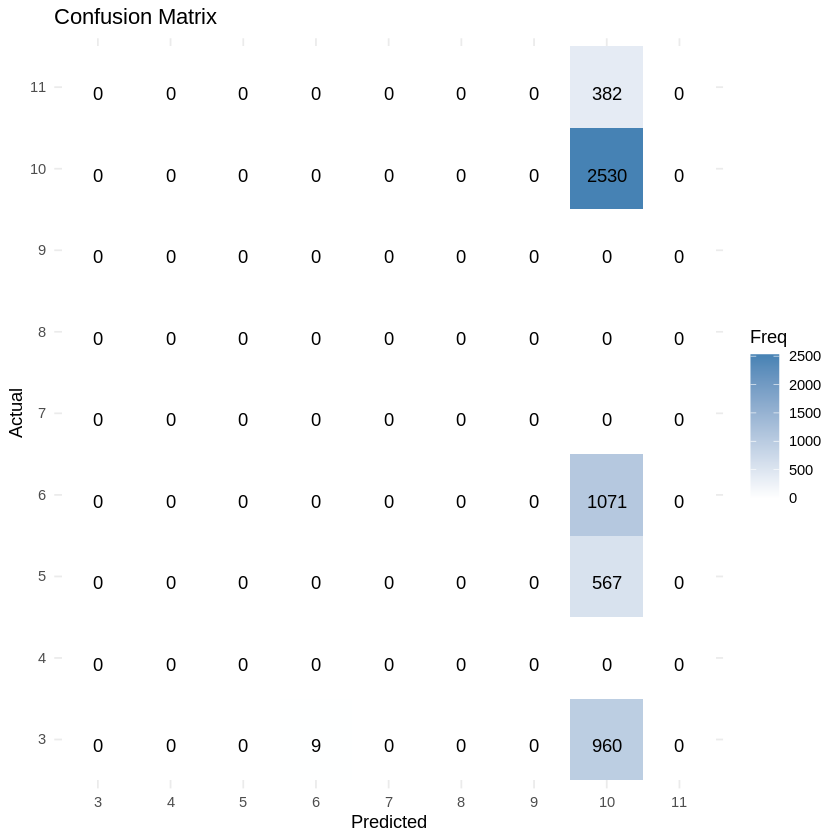

In [39]:
# Adjust 'Actual' and 'Predicted' to your actual column names for truth and predictions
ggplot(cm_df, aes(x = Prediction, y = Reference, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Confusion Matrix", x = "Predicted", y = "Actual") +
  theme_minimal()
